# **Dimension Reduction using PCA**

Principal Component Analysis (PCA) is an unsupervised machine learning algorithm used for dimensionality reduction. It is a statistical method that reduces the dimensionality of a dataset while retaining as much variance as possible. PCA is used to transform the original dataset into a new set of variables called principal components, which are linearly uncorrelated with each other. These principal components are used to represent the original dataset with fewer dimensions, while retaining most of the information.
PCA can be used for a variety of applications, such as image and speech recognition, data compression, and data visualization. In this lab, we will learn how to use PCA for dimensionality reduction.


***About Dataset***

Generates a random dataset in CSV format using Python's Pandas library. You can modify this code according to your requirements.

**Import necessary libraries**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

***Create dataset***

In [ ]:
# set seed for reproducibility
np.random.seed(42)

# generate random data
data = np.random.randn(1000, 10)

# create DataFrame with column names
df = pd.DataFrame(data, columns=['feature_1', 'feature_2', 'feature_3', 'feature_4', 'feature_5', 'feature_6', 'feature_7', 'feature_8', 'feature_9', 'feature_10'])

# add labels to DataFrame
df['label'] = np.random.randint(0, 2, size=1000)

# save DataFrame to CSV file
df.to_csv('data.csv', index=False)


In [ ]:
df = pd.read_csv('data.csv')

In [ ]:
df.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,label
0,0.496714,-0.138264,0.647689,1.523030,-0.234153,-0.234137,1.579213,0.767435,-0.469474,0.542560,1
1,-0.463418,-0.465730,0.241962,-1.913280,-1.724918,-0.562288,-1.012831,0.314247,-0.908024,-1.412304,1
2,1.465649,-0.225776,0.067528,-1.424748,-0.544383,0.110923,-1.150994,0.375698,-0.600639,-0.291694,0
3,-0.601707,1.852278,-0.013497,-1.057711,0.822545,-1.220844,0.208864,-1.959670,-1.328186,0.196861,0
4,0.738467,0.171368,-0.115648,-0.301104,-1.478522,-0.719844,-0.460639,1.057122,0.343618,-1.763040,0


In [ ]:
df.shape

(1000, 11)

***Seperate features and label***

In [ ]:
X = df.drop('label', axis=1)
y = df['label']


***Standardize the features using Scikit-learn's StandardScaler***

In [ ]:
scaler = StandardScaler()
X = scaler.fit_transform(X)


In [ ]:
X

array([[ 0.48354286, -0.16696248,  0.68190886, ...,  0.73942652,
        -0.45254674,  0.53392184],
       [-0.47187899, -0.48941772,  0.26911296, ...,  0.29962931,
        -0.89716418, -1.53513054],
       [ 1.4477243 , -0.25313554,  0.09163944, ...,  0.35926433,
        -0.58552583, -0.34906287],
       ...,
       [-0.91884606,  0.65984504,  0.88293647, ..., -0.87963492,
        -1.00327375, -1.90309315],
       [-0.45434306, -0.52682901,  0.55803613, ..., -1.72884087,
        -0.97109578, -0.85616938],
       [ 1.41585765,  0.15770791,  0.69664139, ..., -0.68980999,
         0.52604821,  0.64169831]])

***Apply PCA to the standardized features using Scikit-learn's PCA***

In [ ]:
pca = PCA()
X_pca = pca.fit_transform(X)

In [ ]:
X_pca.shape

(1000, 10)

***Determine the number of principal components to retain***

In [ ]:
explained_variance = pca.explained_variance_ratio_ # Percentage of variance explained by all principle components in the sorted order.
explained_variance.shape

(10,)

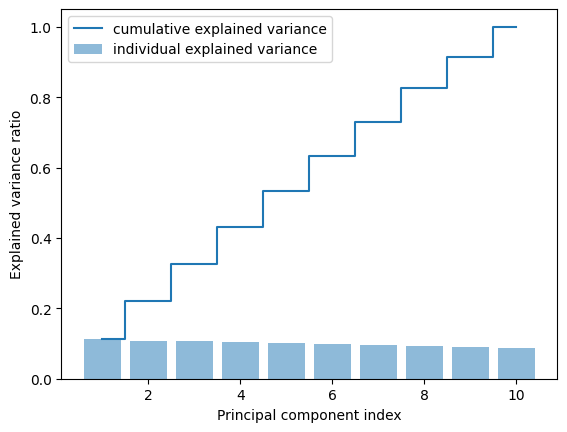

In [ ]:
# calculate cumulative sum of explained variances
cum_var_exp = np.cumsum(explained_variance)

# plot explained variances
plt.bar(range(1,11), explained_variance, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(1,11), cum_var_exp, where='mid',label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.show()

In [ ]:
n_components = np.argmax(np.cumsum(explained_variance) >= 0.85) + 1
n_components

9

***Transform the features using the retained principal components***

In [ ]:
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X)

In [ ]:
X_pca

array([[ 0.14087002, -0.82830928,  0.87722063, ...,  0.47267104,
        -1.64612532,  1.35595763],
       [ 1.48647641,  1.04986745, -0.59943965, ..., -0.87336865,
        -0.07584734, -2.19463722],
       [ 0.73447775,  0.7974278 ,  0.2278794 , ...,  0.03795895,
         0.66791362, -0.67879312],
       ...,
       [ 1.59701063, -0.92549502, -0.86773539, ...,  0.27181765,
        -1.2148774 ,  0.42035329],
       [ 1.31130739,  0.41701375,  1.23187363, ..., -0.55713946,
         0.21261952, -0.96665368],
       [-0.52486057,  1.39777452,  0.52392865, ..., -0.01989061,
         1.61260797, -0.2792058 ]])

***Concatenate the transformed features and labels into a new dataset***

In [ ]:
new_df = pd.concat([pd.DataFrame(X_pca), y], axis=1)

In [ ]:
new_df.head()

,0,1,2,3,4,5,6,7,8,label
0,0.140870,-0.828309,0.877221,0.004460,-0.304857,0.643844,0.472671,-1.646125,1.355958,1
1,1.486476,1.049867,-0.599440,-1.264213,0.505592,0.686403,-0.873369,-0.075847,-2.194637,1
2,0.734478,0.797428,0.227879,-0.797842,1.643168,0.321938,0.037959,0.667914,-0.678793,0
3,1.625328,-0.686944,-0.931831,1.534381,0.235838,0.324873,-0.387924,1.622065,0.037313,0
4,0.327866,-0.814359,-0.081658,-1.963746,0.842916,0.020957,-0.555569,-0.630906,-1.424817,0


In [ ]:
new_df.shape

(1000, 10)

***Save the new dataset***

In [ ]:
new_df.to_csv('new_data.csv', index=False)

In [ ]:
# https://towardsdatascience.com/principal-component-analysis-for-dimensionality-reduction-115a3d157bad
